In [1]:
import pandas as pd
import os
__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'data\\dogodki100samoglavne_strippedOnlySlov.csv')
df = pd.read_csv(input_file, header = 0)
df.head()

naziv  \
0  Fem. seminar: Feminizem, nacionalizem in dru≈æb...   
1         BALKAN x TRAP Night / 21.2.2020 / Max Klub   
2        Med≈°tudijski kongres: (R)evolucija bakterij   
3                              Kvatropirci | Hajdo≈°e   
4                                Lions Obarjada 2020   

                                                opis             datum_od  \
0  predavanje predstaviti ≈°tudija sara farris nas...  2020-02-04 19:30:00   
1  februar znova vraƒçati max klub nadaljevati del...  2020-02-21 22:00:00   
2  bakterija povzroƒçiti evropski unija smrt leto ...  2020-03-07 09:00:00   
3  zaƒçetek leto kvatropirec prviƒç podajati koncer...  2020-02-28 20:00:00   
4  vabiti velik humanitaren dru≈æaben karnevalski ...  2020-02-15 09:00:00   

   stevilo  sifra_prizorisca kategorije_sifre  \
0      300      1.486186e+15            16,32   
1      501      2.346167e+14               15   
2     1519      1.104668e+15                5   
3      368      1.871309e+14        2,6,16,55   
4      336      4.763924e+14    4,5,16,71,158   

                                   kategorije_nazivi  kategorije_sifre_new  \
0                                Kid Friendly,Causes                    32   
1                                              Party                    15   
2                                              Other                     5   
3               Music,Concert,Kid Friendly,Pop music                     2   
4  Volunteering,Other,Kid Friendly,Limited to peo...                     5   

  kategorije_nazivi_new  
0                Causes  
1                 Party  
2                 Other  
3                 Music  
4                 Other

In [2]:
df = df[pd.notnull(df['opis'])]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 0 to 3025
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   naziv                  3026 non-null   object 
 1   opis                   3026 non-null   object 
 2   datum_od               3026 non-null   object 
 3   stevilo                3026 non-null   int64  
 4   sifra_prizorisca       3022 non-null   float64
 5   kategorije_sifre       3026 non-null   object 
 6   kategorije_nazivi      3026 non-null   object 
 7   kategorije_sifre_new   3026 non-null   int64  
 8   kategorije_nazivi_new  3026 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 236.4+ KB


In [4]:
col = ['kategorije_nazivi_new', 'opis']
df = df[col]

In [5]:
df.columns

Index(['kategorije_nazivi_new', 'opis'], dtype='object')

In [6]:
df.columns = ['kategorije_nazivi_new', 'opis']

In [7]:
df['category_id'] = df['kategorije_nazivi_new'].factorize()[0]
from io import StringIO
category_id_df = df[['kategorije_nazivi_new', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'kategorije_nazivi_new']].values)

In [8]:
df.head()

kategorije_nazivi_new                                               opis  \
0                Causes  predavanje predstaviti ≈°tudija sara farris nas...   
1                 Party  februar znova vraƒçati max klub nadaljevati del...   
2                 Other  bakterija povzroƒçiti evropski unija smrt leto ...   
3                 Music  zaƒçetek leto kvatropirec prviƒç podajati koncer...   
4                 Other  vabiti velik humanitaren dru≈æaben karnevalski ...   

   category_id  
0            0  
1            1  
2            2  
3            3  
4            2

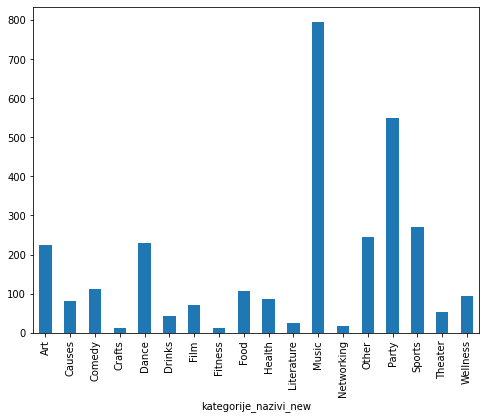

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('kategorije_nazivi_new').opis.count().plot.bar(ylim=0)
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.95, min_df=5, ngram_range=(1, 2), norm='l2')

features = tfidf.fit_transform(df.opis).toarray()
labels = df.category_id
features.shape

(3026, 12187)

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for kategorije_nazivi_new, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(kategorije_nazivi_new))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Art':
  . Most correlated unigrams:
       . razstava
       . galerija
  . Most correlated bigrams:
       . likoven umetnost
       . sodoben umetnost
# 'Causes':
  . Most correlated unigrams:
       . ohranjen
       . oblaƒçilo
  . Most correlated bigrams:
       . kos oblaƒçilo
       . moden dodatek
# 'Comedy':
  . Most correlated unigrams:
       . stand
       . komik
  . Most correlated bigrams:
       . stand komedija
       . rok bohinc
# 'Crafts':
  . Most correlated unigrams:
       . pogreti
       . buƒça
  . Most correlated bigrams:
       . domaƒç dobrota
       . domaƒç obrt
# 'Dance':
  . Most correlated unigrams:
       . bachati
       . plesen
  . Most correlated bigrams:
       . plesen veƒçer
       . lost founda
# 'Drinks':
  . Most correlated unigrams:
       . vinski
       . vino
  . Most correlated bigrams:
       . vipavski dolina
       . slovenski ister
# 'Film':
  . Most correlated unigrams:
       . filmski
       . film
  . Most correlated bigrams:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['opis'], df['kategorije_nazivi_new'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [13]:
predictString = "ƒças lifa prihajati zvezda vedeti vedeti lifa vroƒç vedeti super ≈æurer hoditi dom lifa prihajati fantastiƒçen ogrevanje poskrbeti sandy deej vstopnina predprodaja eventimpo≈°tapetrola predprodaja vrata dan dogodek starosten omejitev aga limiti infa vip rezervacija lifediskoteka gmailc lifeklubdomzati"

print(clf.predict(count_vect.transform([predictString])))

df[df['opis'] == predictString]

['Party']


Empty DataFrame
Columns: [kategorije_nazivi_new, opis, category_id]
Index: []

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

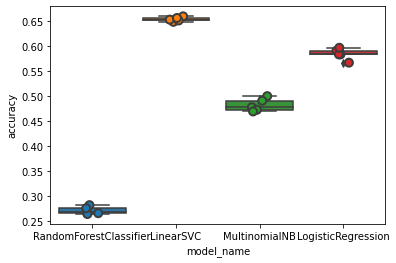

In [15]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.653670
LogisticRegression        0.584268
MultinomialNB             0.482149
RandomForestClassifier    0.271312
Name: accuracy, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

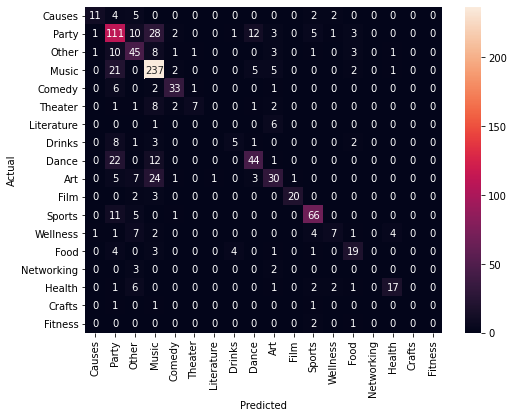

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.kategorije_nazivi_new.values, yticklabels=category_id_df.kategorije_nazivi_new.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['kategorije_nazivi_new', 'opis']])
      print('')

'Other' predicted as 'Party' : 10 examples.


kategorije_nazivi_new                                               opis
906                  Other  alfa klub slovenija fiat klub slovenija skupaj...
2410                 Other  program dan petek sprostitven veƒçer gong gozde...
704                  Other  kdfd korant spuhelj vabiti sejem razstava kora...
599                  Other  lepo vabljen vabljen praznovanje obletnica ≈°tu...
1087                 Other  vrata tradicionalen pomorski krst star nepreki...
638                  Other  dogodek jesenski ƒçist vabiti najbolj noro leto...
2266                 Other  neandertalec sodoben tehnologija uspeti izdela...
991                  Other  ≈æelja prihajajoƒç praznik kvaliteten bo≈æiƒçen fo...
4                    Other  vabiti velik humanitaren dru≈æaben karnevalski ...
2285                 Other  upihniti navdihujoƒç sveƒçka pomagati uresniƒçiti...


'Music' predicted as 'Party' : 21 examples.


kategorije_nazivi_new                                               opis
501                  Music  drag ≈°tudent ≈°tudent du≈°a obljubljen pripravit...
117                  Music  lajf zabava lajf prijatelj lajf kul dogodek va...
2485                 Music  ≈æirfest dober doslej ≈æirfest predstavljati vel...
2784                 Music  fa≈°enka markovci prihajati velik praznik marko...
2342                 Music  kryptonight jump frenzy maribor kje dvorana gu...
1537                 Music  novembrski ≈æur vrata videti zabava soba room z...
2852                 Music  attention velenje izjemno uspe≈°en dogodek mari...
1118                 Music  ljubljanica reka moƒçen tih vijugati buƒça nemo ...
2466                 Music  poskoƒçen rezidenca dru≈æba poskoƒçen muzikant pe...
1661                 Music  prihajati noƒç svet ameri≈°ki vzor haloween kup ...
2432                 Music  mednaroden sreƒçanje motorist biker weekend das...
2264                 Music  fr≈°lus tokrat pusten fr≈°lus dje lilson postreƒç...
775                  Music  first rnba reunion new decada rnba reunion nov...
993                  Music  opna air pool party petek ponovno pripravljati...
751                  Music  sobota vljudno vabiti reks prireditev doma spr...
700                  Music  sladko kisel halloween vrata tradicionalen hal...
676                  Music  zadnji sobota oktober pevka ≈æenska vokalen sku...
2567                 Music  letos skupaj pri≈ægati prazniƒçen luƒçka vabljen ...
1835                 Music  dober ≈æurka ma≈°kara reƒçi sobota torkov nikoli ...
59                   Music  mali velik maska vabljen otro≈°ki pusten rajanj...
1519                 Music  ≈°entech ≈°entjur ponovno vraƒçati ≈°entech tokrat...


'Comedy' predicted as 'Party' : 6 examples.


kategorije_nazivi_new                                               opis
2518                Comedy  jo≈°ka noƒç ƒçarovnica ponovno vraƒçati kjer pripr...
1396                Comedy  krajeven skupnost vogrski kulturen turistiƒçen ...
1418                Comedy  raven prihajati komik kolektiv ceh smeh poskrb...
1525                Comedy  kokokomiƒçen ƒçetrtek bli≈æati izpiten obdobje pr...
2028                Comedy  predstava sreƒçen konec dr≈æava ≈°tajerski republ...
2833                Comedy  kdaj pusten rajanje stolp pungert pusten torek...


'Drinks' predicted as 'Party' : 8 examples.


kategorije_nazivi_new                                               opis
531                 Drinks  martinovanje vas gotovlje otvoritev martinovan...
1014                Drinks  zbrati ura klet svet kralj odpraviti obisk kle...
2428                Drinks  vino voda klub ptujski ≈°tudent letos leto orga...
572                 Drinks  kne≈æji degustacija gin sodelovanje selection k...
2106                Drinks  vedeti ljudski rek praviti martinovo jesenski ...
597                 Drinks  degustacija viski sodelovanje selection kdaj s...
2938                Drinks  vabljen arena nepozabno zabava tekmovalec kmet...
1458                Drinks  leto pripravljati dogodek kjer dru≈æba kolektiv...


'Dance' predicted as 'Party' : 22 examples.


kategorije_nazivi_new                                               opis
453                  Dance  toƒçno leto minevati zaƒçeti zgodba paracosmi lo...
2014                 Dance  konec februar zavetje swenak vraƒçati idr tokra...
2877                 Dance  drag prijatelj vraƒçati dobro poznan mojster dj...
570                  Dance  dober bolj zaƒçinjen kaƒçi≈°nec vljudno vabljen t...
1122                 Dance  vabljen tradicionalen pust party pub sinji gor...
1098                 Dance  prihajati oktoberfe≈°ta okrepƒçevalnica matija p...
1256                 Dance  noƒç lahko izku≈°nja dvigniti las pokonci lahko ...
1841                 Dance  nagraden igra top koncert skupina uƒçiteljica p...
2584                 Dance  urban grooves pekarna gustafa zadnjiƒç letos do...
2566                 Dance  velik veselica ≈°otor letnica pgd tepanje hkrat...
838                  Dance  dje kabina spustiti plesi≈°ƒçe obiskovalec povez...
533                  Dance  lepo vabljen predprazniƒçen ≈æur okrepƒçevalnica ...
503                  Dance  zlat ≈æila ime ljubav buditi malen javiti jedin...
2137                 Dance  nikoli prezgodaj naƒçrtovati halloween zaƒçetek ...
2365                 Dance  tehnoburleska tat podoba nem komedija telo par...
1580                 Dance  jen jen sit slab novodoben muzika ƒças dober st...
2293                 Dance  letos ligojen potekati tradicionan petkov pump...
581                  Dance                                obletnica otvoritev
1939                 Dance  konec poletje vabljen trdicijonalen pohod kovk...
1100                 Dance  december ƒças veselje zabava zato vabiti pridru...
1843                 Dance  leto ƒças pusten ≈°ema bli≈æati zato priti sobota...
1533                 Dance  nov ≈°olski leto zaƒçeti ≈°tudijski leto vrata no...


'Sports' predicted as 'Party' : 11 examples.


kategorije_nazivi_new                                               opis
2707                Sports  grajski gospod vabiti srednjeve≈°ki dan lemberg...
1239                Sports  zgled kolega ata sabak odloƒçiti prikraj≈°an otr...
1109                Sports  balvanija praznovati rojsten dan koledar opomn...
1288                Sports  pribli≈æevati zima vesel december drsali≈°ƒçe med...
2230                Sports  marija jegliƒç uspe≈°en slovenski leto dogodiv≈°ƒç...
1521                Sports  di≈°ati sneg nikakor misliti bel strmina potem ...
2657                Sports  prviƒç revers lapa minuta obrniti smer vo≈ænja z...
619                 Sports  skupaj kurs klub ≈°tudent ru≈°a selnica lovrenc ...
132                 Sports  praviti lep enkrat konec dogodek gremovhrib ve...
2240                Sports  drag zavedati zmagati pomagati dogodek prestav...
1654                Sports  vztrajnosten amaterski dirka potekati ura takt...


'Party' predicted as 'Other' : 10 examples.


kategorije_nazivi_new                                               opis
2640                 Party  leto≈°nji september obƒçina ilirski bistrica sod...
2586                 Party  vabiti dan odprt vrata ƒçetrtek ura sede≈æ podje...
2064                 Party  kolumbija venezuela zadnji dr≈æava potovanje ju...
641                  Party  meddru≈°tven razstava mali pasemski ≈æival prire...
2689                 Party  turistiƒçen dru≈°tvo star letos prirejati dan og...
245                  Party  zavod turizem cerklje obƒçina cerklje sodelovan...
402                  Party  sodelovanje vitez najemnik celjski grof pripra...
251                  Party  poleten dogajanje letos poskrbeti tradicionale...
1260                 Party  ƒçetrtek vljudno vabljen noƒç ƒçarovnica potekati...
2376                 Party  dru≈æinski dan prihajati brezica sodelovanje ho...


'Art' predicted as 'Other' : 7 examples.


kategorije_nazivi_new                                               opis
1599                   Art  mednaroden dan turistiƒçen vodnik vabiti ogled ...
2426                   Art  zsolt mikl√≥sv√∂lgy m√°ri√≥ nemes technologia unda...
2815                   Art  govorica nem obraz obraz govorica te≈æko razume...
459                    Art  mlad danes narediti youtuber influencer zdravn...
1648                   Art  jan dular dru≈æina ustvariti afrik najbolj srƒçe...
752                    Art  obve≈°ƒçati predavanje ogorevc razprodan vstopni...
1255                   Art  luƒç aktualen situacija obvladovati desen lev p...


'Wellness' predicted as 'Other' : 7 examples.


kategorije_nazivi_new                                               opis
1724              Wellness  mesto seminar zaseden inspirativen seminar otr...
104               Wellness  maribor prihajati lep kraj pripraviti personal...
545               Wellness  tradicionalen adventen razstava letos velik sp...
2312              Wellness  matej delakord govornik maraton pozitiven psih...
997               Wellness  novost leto≈°nji maraton pozitiven psihologija ...
1161              Wellness  marjan korotati serepethin lepo vabljen predav...
1217              Wellness  celodneven dru≈æenje priznan poznavalec pot dob...


'Health' predicted as 'Other' : 6 examples.


kategorije_nazivi_new                                               opis
1902                Health  sreƒçanje ospredje predstavitev razliƒçen oblika...
1086                Health  predstavitev sodoben ƒçlovek preveƒç ≈æiveti idej...
1450                Health  sekcija ≈°tudent zdru≈æenje fizioterapev sloveni...
2302                Health  reden profesor dejan dinevski medicinski fakul...
2497                Health  vabljen strokovno delavnica psihedelika terapi...
2937                Health  kdaj sobota november urnik ura kje zalo≈°ki ces...


'Party' predicted as 'Music' : 28 examples.


kategorije_nazivi_new                                               opis
2216                 Party  english below nov leto tukaj jesenski piknik m...
2192                 Party  edin vabljen pot kjer dvorana leden sonce ring...
385                  Party  velik dober zlitje slovenski ljubezenski pesem...
2718                 Party  vabiti december pre≈æiveti dru≈æba pripravljati ...
1682                 Party  bang elements hip hop koncert smok mardeljan s...
615                  Party  ansambel brlog praznovati obletnica obetati pe...
674                  Party  balkan mania cren mi≈°iƒá pergola club velik bal...
766                  Party  star grad celj de≈æela celjski vabiti vrve≈æ tr≈°...
1503                 Party  vroƒçica poleten soboten noƒç odliƒçen glasba dru...
2734                 Party  nepozaben lanski praznovanje letos praznovati ...
898                  Party  obƒçina grosuplje turizem grosuplje sodelovanje...
1427                 Party  vstopnica early bird ubog predprodaja skromen ...
1894                 Party   izreden stanje zveza koronavirus koncert odpasti
427                  Party  nov leto velik premakljiv butalski praznik vra...
1232                 Party  francijev oder prihajati domena kumer tujina v...
1712                 Party  jesen leten ƒças narava obdariti plod zato pril...
215                  Party  ≈°kuc ksba bob log iia blues punk guitar danec ...
596                  Party  pravljica pri≈æig luƒçka zasedba avtomobil meste...
1627                 Party  rock arounda clock presents per night ples slo...
944                  Party  grajski ≈æiv ≈æava vraƒçati grad podsreda stopiti...
2194                 Party  ponos erick morilla malo stvar svet glasba zab...
1025                 Party  gasilec tradicionalno organizirati kresovanje ...
2977                 Party  leto dan vraƒçati primorski velikan glasba vese...
781                  Party  skupina ≈°an ≈°en imeti ≈°enjast veƒçer tokrat prv...
2056                 Party  clubbing session maj intihar friends nov nov z...
2100                 Party  valentina technasia vstopnica cena evro oƒçe sl...
1254                 Party  halloween ansambel stil inesa erbus dvorana vi...
2911                 Party  december ostriga prihajati dober plesen dogode...


'Other' predicted as 'Music' : 8 examples.


kategorije_nazivi_new                                               opis
1850                 Other  slovenija miting mali letalstvo lesce velik mi...
2884                 Other  prostovoljno gasilski dru≈°tvo ≈°kofji lok vljud...
2828                 Other  ura zasvetiti svetlica javen zavod ceza obƒçina...
296                  Other  sli≈°ati krisov zgodba takoj stopiti akcija pri...
628                  Other  pridru≈æiti tradicionalen sejem prazniƒçen dobro...
2048                 Other  leto praznovati leto doma krajan negovan nemec...
1246                 Other  predavati nina smola hoja francosko≈°panski pot...
2231                 Other  spo≈°tovan tovari≈°ica tovari≈° drag prijateljica...


'Theater' predicted as 'Music' : 8 examples.


kategorije_nazivi_new                                               opis
2501               Theater  bohuslav martin≈Ø ≈æenitev komiƒçen opera dejanje...
910                Theater  zamuditi pravljiƒçen muzikal imeti sedaj nov pr...
962                Theater  postati heroj pripeljati beseda vedeti bel het...
135                Theater  frivolus festival uliƒçen umetnik dan oƒçarati o...
2201               Theater  muzikal mamma mia ogledati videti enkrat zadnj...
2118               Theater  zapornik vƒçasih ≈æivljenje prinesti lep lahko z...
134                Theater  frivolus festival uliƒçen umetnik dan oƒçarati o...
1390               Theater  ƒçlanica skupina igralka gledali≈°ƒçe dakh kijev ...


'Dance' predicted as 'Music' : 12 examples.


kategorije_nazivi_new                                               opis
295                  Dance  baleten predstava zvezda piran sklop poleten f...
1811                 Dance  iti was all drea biggie smalls tokraten izdaja...
1758                 Dance  vesel december zato kgti vabiti petek marco po...
655                  Dance  vesel december diskoteka marco polo koncert sk...
2903                 Dance  sobota februar espacia flamenca tablao skupina...
1538                 Dance  program pregled prenovljen prostor lokev razst...
927                  Dance  friends jack pripravljati poseben event amadeu...
2913                 Dance  prihajati najbolj vroƒç terasa krvavec mamba ki...
748                  Dance  ƒëungla stric harmonika tromostovje zaƒçeti spre...
1923                 Dance  otvoritev nov sezona rolanda tora ustanovitelj...
1935                 Dance  obetati kizomba ≈æur leto ljubljana prihajati e...
1106                 Dance  dobiti zme≈°ati francozev pozavna trobenta bobe...


'Art' predicted as 'Music' : 24 examples.


kategorije_nazivi_new                                               opis
1273                   Art  leto iva dimch koreograf performer vizualen um...
2908                   Art  osrednji novome≈°ki prireditev kulturen praznik...
880                    Art  jubilejen prireditev pesem vas ime tolminski p...
1491                   Art  ditka svet glasba vstopiti majhen deklica oƒçe ...
306                    Art  pol kod saba me≈°an mo≈°ko≈æenski veƒçƒçlanski zase...
723                    Art  tradicionalen bo≈æiƒçnonovoleten koncert goran b...
1775                   Art  simona semeniƒç naslov izhodi≈°ƒçe ustvarjalen pr...
909                    Art  napovedovati slavnosten veƒçer opernobaleten sp...
2579                   Art  samospev balet operen baleten veƒçer naslov lju...
2532                   Art  simona semeniƒç naslov izhodi≈°ƒçe ustvarjalen pr...
1665                   Art  poletje bazen avgustovski petek predstavljati ...
1108                   Art  bli≈æati december uspe≈°nica beton ltd english b...
2583                   Art  ≈æiv jaslice prost primer slab vreme cerkev pol...
1212                   Art  orkester ava mlad sestav delovati leto takrate...
841                    Art  december pribli≈æevati prihod dober mo≈æ vrsta m...
206                    Art  grhca booking kuda bunker sodelovanje mladinsk...
688                    Art  deerhoof terasa layerjev hi≈°a ponedeljek vstop...
57                     Art  moonlea records koncerten cikel balkanski podt...
1065                   Art  drag medicinec beseda hvala kratek razdalja ƒçl...
1477                   Art  veƒçer leto≈°nji dan arnold tovornik torek marec...
2082                   Art  leto otvoriti prazniƒçen december tradicionalen...
2544                   Art  leto vraƒçati oder idrija swenak pripraviti pos...
1936                   Art  spaceship eartha trio vesoljec dobro razumeti ...
1199                   Art  valentinov koncert ljubezenski poezija ditka b...


'Party' predicted as 'Dance' : 12 examples.


kategorije_nazivi_new                                               opis
2927                 Party  vabljen spektakel mademoisell plesen studio le...
1041                 Party  zabava evforija tinkara alenka omemba turneja ...
1950                 Party  otvoritev sezona just serialka klet ekipa gost...
2406                 Party  letos nastopati tequiti petkov pumpa sreƒçelov ...
582                  Party  maka iti december remember prihajati zadnji me...
938                  Party  lif noreti zadnji dan februar prestopen leto t...
1829                 Party  drag gost november dalje pihati sveƒçka torta v...
2494                 Party  pridru≈æiti rosat do≈æivetje petek ura terasa my...
425                  Party  dogodek potekati gasilski dom vrzdenec namenje...
518                  Party  ica cold vzhajajoƒç zvezda regijski trap scena ...
1602                 Party  ƒças lif prihajati zvezda vedeti vedeti lif vro...
2837                 Party  petek reggaeton rnba night mrzlica obnoreti me...


'Literature' predicted as 'Art' : 6 examples.


kategorije_nazivi_new                                               opis
302             Literature  poƒçastitev knji≈ænica sevnica vabljen osrednji ...
722             Literature  vljudno vabljenea predstavitev pesni≈°ki prvenk...
961             Literature  povezovati bernarda ≈æarna glasba balladera klu...
1359            Literature  knjiga spregovorileo katji ƒçiƒçigoj tanje rener...
2170            Literature  razstava velenje prikazovati urbanistiƒçen zasn...
2931            Literature  maƒçek findus praznovanje rojsten dan znati pre...

In [20]:
model.fit(features, labels)

LinearSVC()

In [21]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Art':
  . Top unigrams:
       . galerija
       . umetnost
  . Top bigrams:
       . vabljen koncert
       . karta dobiti
# 'Causes':
  . Top unigrams:
       . oblaƒçilo
       . zahtevati
  . Top bigrams:
       . okrogel miza
       . spo≈°tovan ljubitelj
# 'Comedy':
  . Top unigrams:
       . stand
       . komik
  . Top bigrams:
       . tadej to≈°
       . stand veƒçer
# 'Crafts':
  . Top unigrams:
       . buƒça
       . izdelek
  . Top bigrams:
       . domaƒç dobrota
       . domaƒç obrt
# 'Dance':
  . Top unigrams:
       . plesen
       . ples
  . Top bigrams:
       . plesen veƒçer
       . glasba ƒças
# 'Drinks':
  . Top unigrams:
       . vino
       . degustacija
  . Top bigrams:
       . reljati popoviƒá
       . slovenski ister
# 'Film':
  . Top unigrams:
       . film
       . filmski
  . Top bigrams:
       . vstopnica prodaja
       . slovenski film
# 'Fitness':
  . Top unigrams:
       . opna
       . fitnes
  . Top bigrams:
       . mednaroden tekmovanje
    

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['kategorije_nazivi_new'].unique()))

              precision    recall  f1-score   support

      Causes       0.79      0.46      0.58        24
       Party       0.54      0.63      0.58       177
       Other       0.49      0.61      0.54        74
       Music       0.71      0.87      0.78       273
      Comedy       0.79      0.77      0.78        43
     Theater       0.78      0.32      0.45        22
  Literature       0.00      0.00      0.00         7
      Drinks       0.50      0.25      0.33        20
       Dance       0.67      0.56      0.61        79
         Art       0.55      0.42      0.47        72
        Film       0.95      0.80      0.87        25
      Sports       0.79      0.80      0.79        83
    Wellness       0.58      0.26      0.36        27
        Food       0.59      0.59      0.59        32
  Networking       0.00      0.00      0.00         5
      Health       0.74      0.57      0.64        30
      Crafts       0.00      0.00      0.00         3
     Fitness       0.00    

In [24]:

   
from extras.textCleaningNLTK import preprocessText

texts = ["""ƒåe ste zamudili silvestrsko predstavo Jazz ali pa bi si jo radi ogledali ≈°e enkrat ... ü§©‚ÜôÔ∏è
Romantiƒçno dramo Nejca Gazvode Jazz, ki smo si jo lahko na silvestrovo premierno v ≈æivo ogledali na spletu, bomo ponovili tudi v ƒçetrtek, 14. januarja, ob 20. uri.
Januarska ponovitev bo posnetek s premiere, 31. decembra, ki si jo boste lahko ogledali na spletni strani tretjioder.si.
E-vstopnice so ≈æe v prodaji po ceni 10 eur.
E-vstopnice so ≈æe v prodaji na povezavi:
https://tretjioder.si/trgovina/predstava-jazz-14-1/
#jazz2020
Nejc Gazvoda
Jazz
Romantiƒçna drama
Krstna uprizoritev
re≈æiser Nejc Gazvoda
igrata Ajda Smrekar in Sebastian Cavazza
Streha razko≈°ne vile, v kateri poteka zabava v maskah. Veƒçer, zvezde, glasba, penina. Na balkonu se sreƒçata mo≈°ki in ≈æenska. Oba sta obleƒçena v ptiƒça. Ona je stara nekaj ƒçez trideset, on je sredi ≈°tiridesetih. On je pianist, ki je ≈°e ravnokar igral na zabavi. Ona je ... obiskovalka? Natakarica? Zapleteta se v pogovor. Na koncu veƒçera ‚Äì v katerem bosta drug o drugem nekaj izvedela in stkala krhke vezi poznanstva, kar ≈æe spominja na toplo ƒçlove≈°ko bli≈æino (ƒçe je kaj takega v enem veƒçeru sploh mogoƒçe zaƒçutiti do popolnega tujca) ‚Äì se dogovorita, da se bosta na istem balkonu znova sreƒçala ob letu osorej. In tako nadaljnjih pet let. Odnos se bo poglabljal, podatkih o njunih ≈æivljenjih postopoma razkrivali. Vsako leto v novi maski in brez v√©denja, kako je drugemu ime, bosta mo≈°ki in ≈æenska drug drugemu postala pomemben del ≈æivljenja, dan zabave in sreƒçanja pa datum, ki bo v njunih ≈æivljenjih nekaj pomenil, ƒçetudi bosta ti ≈æivljenji preostalih 364 dni tekli po svoje ... Katero leto bo zadnje?"""]
textsCleaned = []
for text in texts:
    textsCleaned.append(preprocessText(text))
    
text_features = tfidf.transform(textsCleaned)
predictions = model.predict(text_features)
for text, predicted in zip(textsCleaned, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")



"zamuditi silvestrski predstava jazz ogledati enkrat romantiƒçno drama nejec gazvod jazz lahko silvestrovo premierno ≈æivo ogledati splet ponoviti ƒçetrtek januar ura januarski ponovitev posnetek premiera december lahko ogledati spleten stran tretjioders evstopnica prodaja cena eura evstopnica prodaja povezava nejc gazvoda jazz romantiƒçen drama krsten uprizoritev re≈æiser nejc gazvoda igrati ajda smrekar sebastian cavazza streha razko≈°en vila potekati zabava maska veƒçer zvezda glasba penina balkon sreƒçati mo≈°ki ≈æenska obleƒçen ptiƒç star pianist ravnokar igrati zabava obiskovalka natakarica zaplesti pogovor konec veƒçer izvedeti stkati krhek vez poznanstvo spominjati toplo ƒçlove≈°ki bli≈æina veƒçer mogoƒç zaƒçutiti popoln tujec dogovoriti balkon znova sreƒçati leto osorej nadaljnji leto odnos poglabljati podatek ≈æivljenje postopoma razkrivati leto nov maska v√©denje ime mo≈°ki ≈æenska postati pomemben del ≈æivljenje dan zabava sreƒçanje datum ≈æivljenje pomeniti ≈æivljenje preo